In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import DataLoader
from src.features import Features
from src.label_generator import LabelGenerator

loader = DataLoader()
fe = Features()
lg = LabelGenerator()

df = loader.download("AAPL")
df = fe.add_features(df)
df = lg.add_labels(df)

df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,return,volatility_20,log_return,...,sma_50,ema_50,rsi_14,macd,macd_signal,bb_width,atr,vol_change,obv,target
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,...,,,,,,,,,,
49,2015-03-16,27.809704,31.237499,31.237499,30.717501,30.969999,143497200,0.011004,0.013712,0.010944,...,29.91460,30.340789,32.710716,0.229702,0.511192,0.086727,0.716428,-0.307811,3.627169e+09,1
50,2015-03-17,28.274866,31.760000,31.830000,31.412500,31.475000,204092400,0.016727,0.014193,0.016588,...,30.00315,30.396444,45.533452,0.240975,0.457149,0.086874,0.686964,0.422274,3.831262e+09,1
51,2015-03-18,28.593134,32.117500,32.290001,31.592501,31.750000,261083600,0.011256,0.014339,0.011193,...,30.11425,30.463937,44.971639,0.275579,0.420835,0.086744,0.660714,0.279242,4.092345e+09,0
52,2015-03-19,28.377243,31.875000,32.312500,31.850000,32.187500,183238000,-0.007550,0.014433,-0.007579,...,30.22045,30.519272,47.391285,0.280206,0.392709,0.086584,0.652143,-0.298164,3.909107e+09,0
53,2015-03-20,28.021141,31.475000,32.099998,31.290001,32.062500,274780400,-0.012549,0.014538,-0.012628,...,30.31120,30.556752,41.765631,0.248728,0.363913,0.086321,0.674643,0.499582,3.634327e+09,1


In [4]:
df["target"].value_counts(normalize=True)


target
1    0.528371
0    0.471629
Name: proportion, dtype: float64

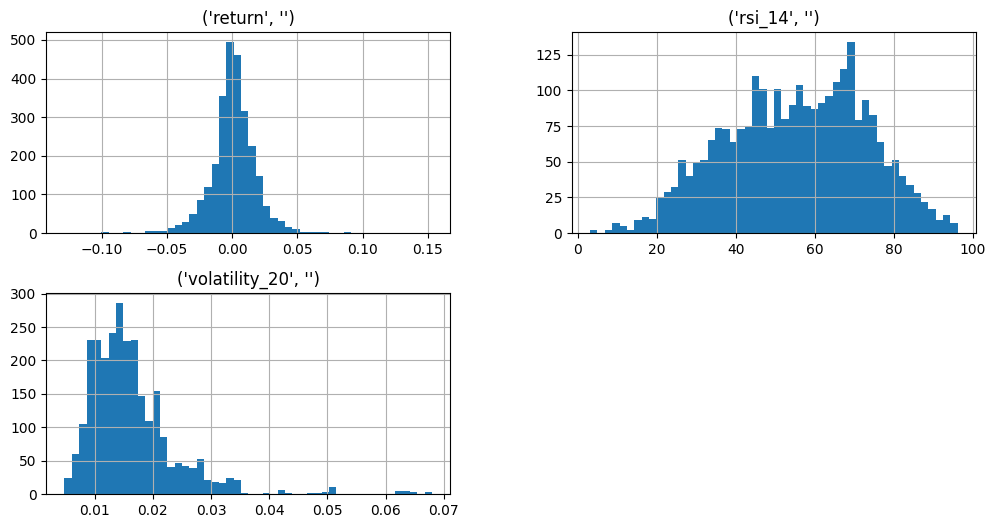

In [5]:
df[["return", "rsi_14", "volatility_20"]].hist(
    bins=50,
    figsize=(12, 6)
)
plt.show()


C:\Users\Redmi\AppData\Local\Temp\ipykernel_15268\457503933.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Date"]).corr(),


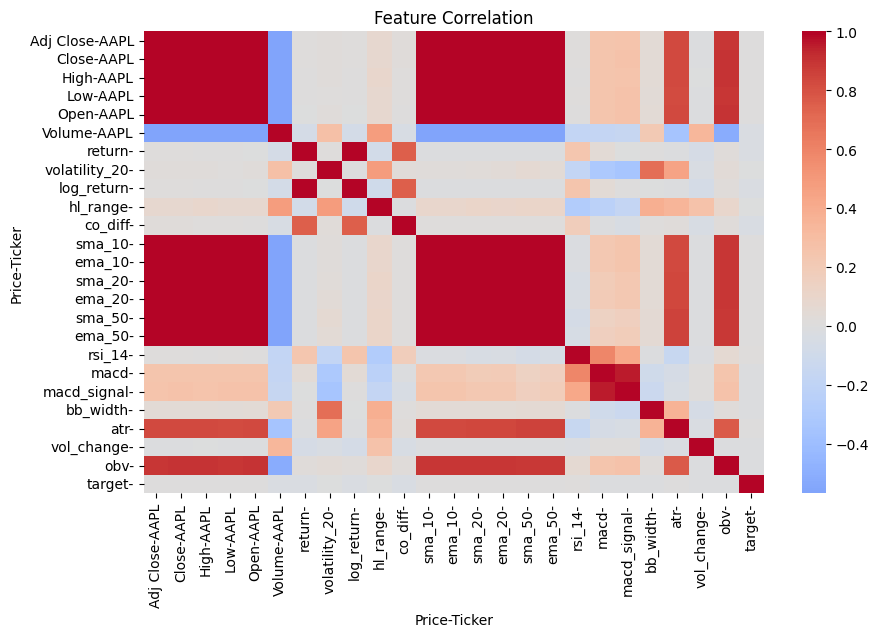

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.drop(columns=["Date"]).corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation")
plt.show()


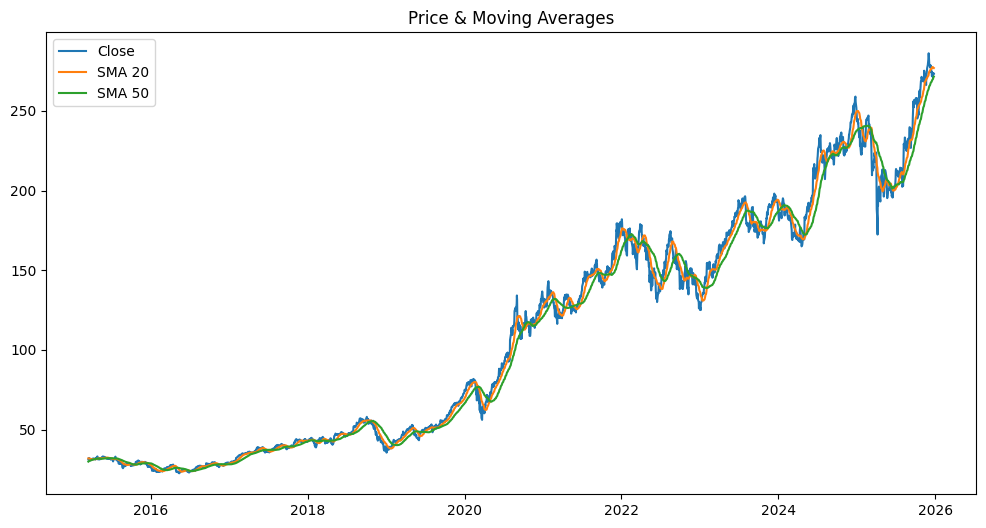

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["sma_20"], label="SMA 20")
plt.plot(df["Date"], df["sma_50"], label="SMA 50")
plt.legend()
plt.title("Price & Moving Averages")
plt.show()


## EDA Insights & Observations

### Data Quality
- No missing values in OHLCV data after cleaning
- Indicators were computed successfully after feature engineering

### Distribution Analysis
- Returns are centered around zero with heavy tails (expected in financial data)
- RSI shows most values between 30–70, indicating range-bound behavior
- Volatility clusters during certain periods, confirming regime shifts

### Key Takeaways
- Stock returns are noisy which limits achievable accuracy
- Technical indicators provide non-linear signals (good for RF & SVM)
- Feature scaling will be required for SVM

### Next Steps
- Generate direction labels (UP / DOWN)
- Perform time-based train-test split
- Train Decision Tree, Random Forest, and SVM models
